# Central

In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import libs.ensemble
import libs.local
import libs.plot
import libs.vars
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({ 'font.size': 18 })

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
# ----- SPECIFIC SETTINGS -----
component = 'Amon'
experiment = 'ssp585'
variable_id = 'pr'

conf = [v for v in libs.vars.variables() if v['variable_id'] == variable_id][0]
time_series_text = '''total precipitation (solid), rainfall (dashed), snowfall (dashdot), 
and evaporation (dotted) over sea-ice and ocean'''

time_series_weighted_method = conf['weighting_method']
time_series_units = conf['units']
time_series_y_label = f'Precipitation ({time_series_units})'
time_series_y_range = (0, 2.25)
time_series_y_range_monthly = (0, 3)
time_series_process = lambda x: x

In [4]:
region = 'Central'
suffix = '_delta_1980-2010'

ensemble_pr_time_series = time_series_process(
    libs.local.get_ensemble_series(variable_id, experiment, region=region, suffix=suffix)
)

# ----- prra -----
ensemble_prra_time_series = time_series_process(
    libs.local.get_ensemble_series('prra', experiment, region=region, suffix=suffix)
)
for variable in ensemble_prra_time_series:
    ensemble_prra_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashed' }

# ----- prsn -----
ensemble_prsn_time_series = time_series_process(
    libs.local.get_ensemble_series('prsn', experiment, region=region, suffix=suffix)
)
for variable in ensemble_prsn_time_series:
    ensemble_prsn_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashdot' }

# ----- tas -----
ensemble_tas_time_series = libs.local.get_ensemble_series('tas', experiment, region=region, suffix=suffix)
#ensemble_tas_time_series /= 10

# ----- evspsbl -----
ensemble_evspsbl_time_series = libs.local.get_ensemble_series('evspsbl', experiment, region=region, suffix=suffix)

for variable in ensemble_evspsbl_time_series:
    ensemble_evspsbl_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dotted' }


time_slices = libs.vars.default_time_slices()

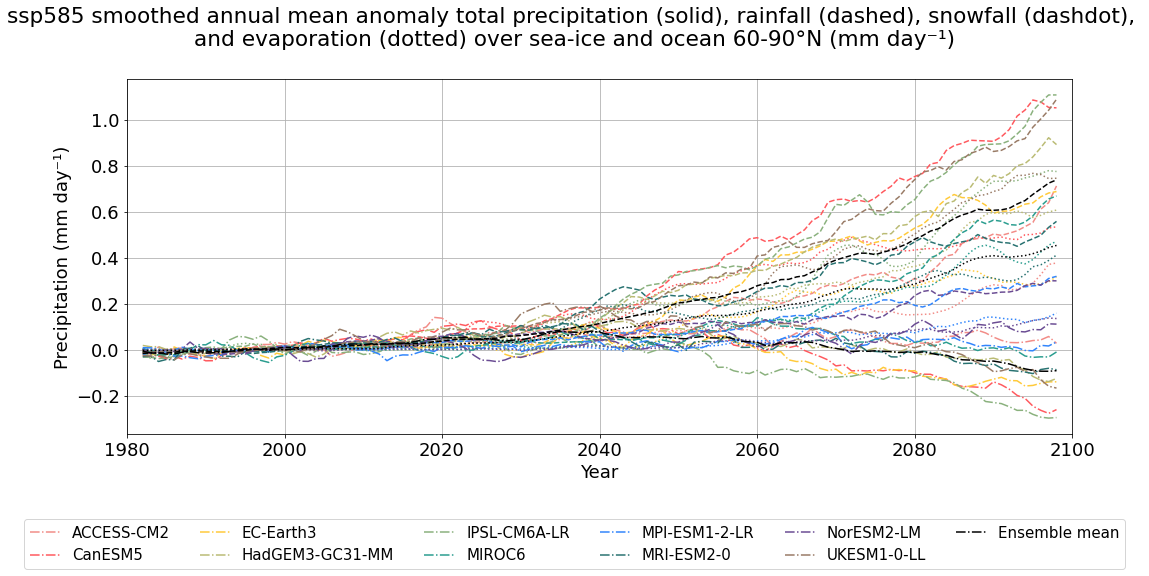

In [5]:
# libs.plot.time_series_from_vars(
#     [
#         ensemble_pr_time_series_smooth,
#         ensemble_prsn_time_series_smooth,
#         ensemble_prra_time_series_smooth,
#         ensemble_evspsbl_time_series_smooth
#     ],
#     title=f'{experiment} smoothed mean\n{time_series_text} 60-90°N ({time_series_units})',
#     xattr='time',
#     ylabel=time_series_y_label,
#     yrange=time_series_y_range
# );

vars_series = [
    #ensemble_pr_time_series,
    ensemble_prsn_time_series,
    ensemble_prra_time_series,
    ensemble_evspsbl_time_series
]
plot_arr = []
for item in vars_series:
    item_processed = item.groupby('time.year').mean('time').rolling(year=5, center=True).mean('year')
    item_processed = libs.ensemble.calc_variable_mean(item_processed)
    plot_arr.append(item_processed)

plot_arr[0]['Ensemble mean'].attrs['plot_kwargs'] = { 'linestyle': 'dashdot' }
plot_arr[1]['Ensemble mean'].attrs['plot_kwargs'] = { 'linestyle': 'dashed' }
plot_arr[2]['Ensemble mean'].attrs['plot_kwargs'] = { 'linestyle': 'dotted' }

libs.plot.time_series_from_vars(
    plot_arr,
    title=f'{experiment} smoothed annual mean anomaly {time_series_text} 60-90°N ({time_series_units})',
    xattr='year',
    ylabel=time_series_y_label,
    #yrange=time_series_y_range
);

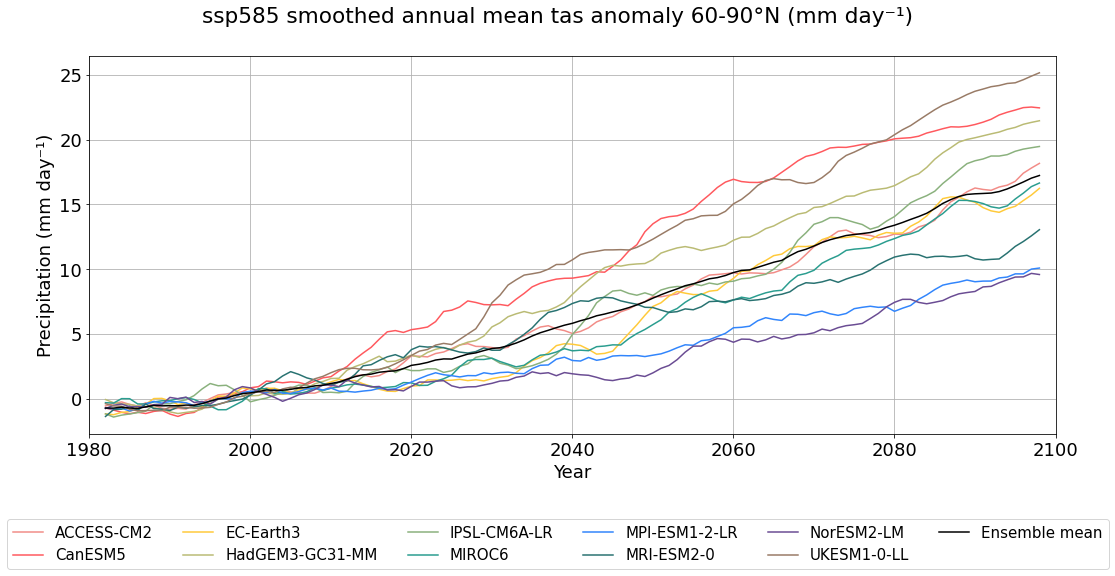

In [6]:
# libs.plot.time_series_from_vars(
#     [
#         ensemble_pr_time_series_smooth,
#         ensemble_prsn_time_series_smooth,
#         ensemble_prra_time_series_smooth,
#         ensemble_evspsbl_time_series_smooth
#     ],
#     title=f'{experiment} smoothed mean\n{time_series_text} 60-90°N ({time_series_units})',
#     xattr='time',
#     ylabel=time_series_y_label,
#     yrange=time_series_y_range
# );

vars_series = [
    ensemble_tas_time_series
]
plot_arr = []
for item in vars_series:
    item_processed = item.groupby('time.year').mean('time').rolling(year=5, center=True).mean('year')
    item_processed = libs.ensemble.calc_variable_mean(item_processed)
    plot_arr.append(item_processed)

libs.plot.time_series_from_vars(
    plot_arr,
    title=f'{experiment} smoothed annual mean tas anomaly 60-90°N ({time_series_units})',
    xattr='year',
    ylabel='Temperature (C)'
    #yrange=time_series_y_range
);

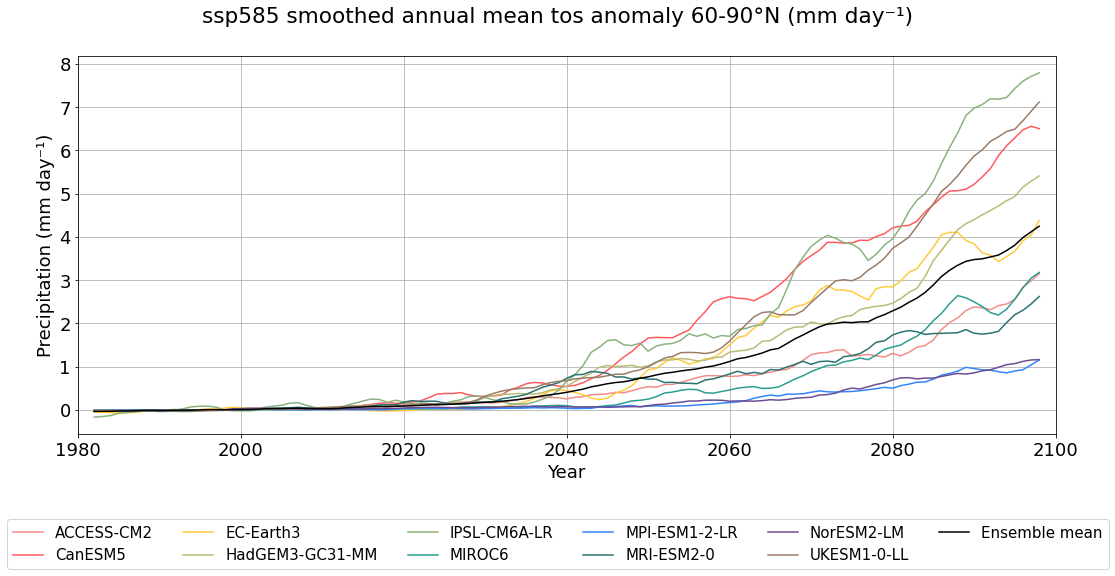

In [7]:
ensemble_tos_time_series = libs.local.get_ensemble_series('tos', experiment, region=region, suffix=suffix)
vars_series = [
    ensemble_tos_time_series
]
plot_arr = []
for item in vars_series:
    item_processed = item.groupby('time.year').mean('time').rolling(year=5, center=True).mean('year')
    item_processed = libs.ensemble.calc_variable_mean(item_processed)
    plot_arr.append(item_processed)

libs.plot.time_series_from_vars(
    plot_arr,
    title=f'{experiment} smoothed annual mean tos anomaly 60-90°N ({time_series_units})',
    xattr='year',
    ylabel='Temperature (C)',
    #yrange=time_series_y_range
);

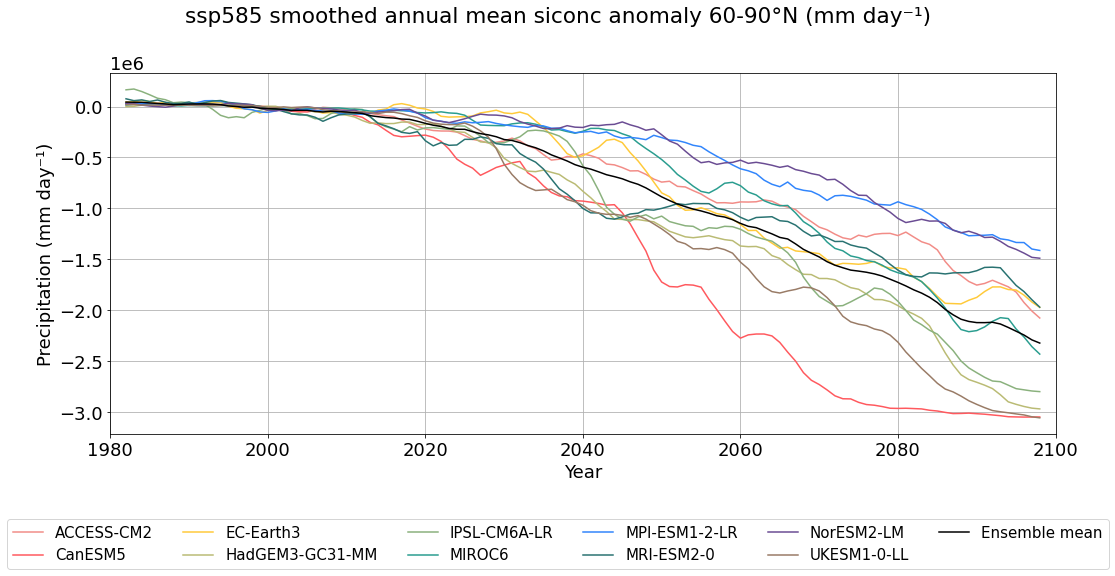

In [8]:
ensemble_siconc_time_series = libs.local.get_ensemble_series('siconc', experiment, region=region, suffix=suffix)
vars_series = [
    ensemble_siconc_time_series
]
plot_arr = []
for item in vars_series:
    item_processed = item.groupby('time.year').mean('time').rolling(year=5, center=True).mean('year')
    item_processed = libs.ensemble.calc_variable_mean(item_processed)
    plot_arr.append(item_processed)

libs.plot.time_series_from_vars(
    plot_arr,
    title=f'{experiment} smoothed annual mean siconc anomaly 60-90°N ({time_series_units})',
    xattr='year',
    ylabel='Sea-ice area km2',
    #yrange=time_series_y_range
);

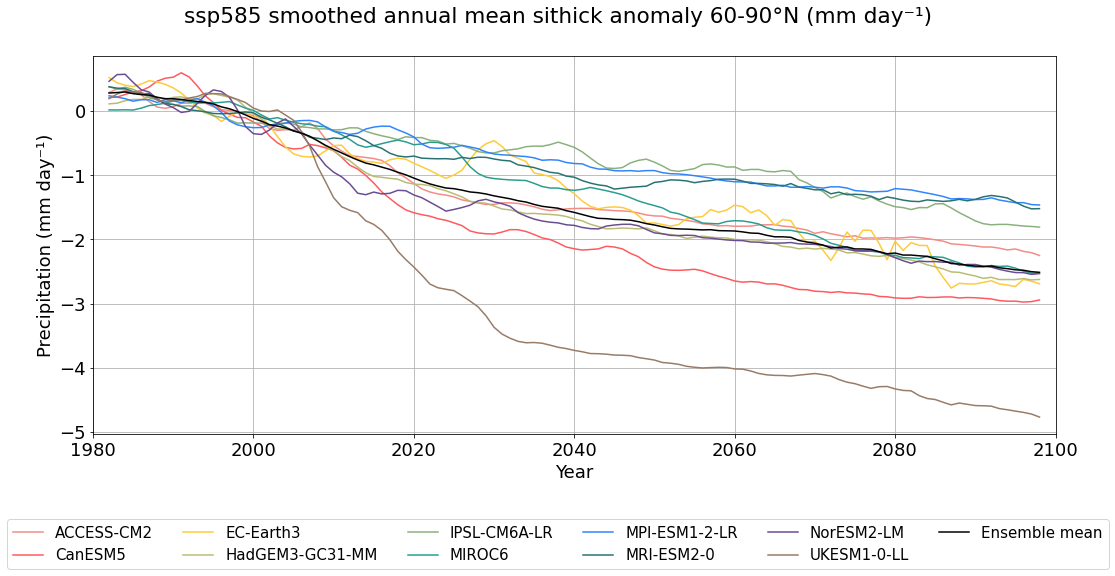

In [9]:
ensemble_sithick_time_series = libs.local.get_ensemble_series('sithick', experiment, region=region, suffix=suffix)
vars_series = [
    ensemble_sithick_time_series
]
plot_arr = []
for item in vars_series:
    item_processed = item.groupby('time.year').mean('time').rolling(year=5, center=True).mean('year')
    item_processed = libs.ensemble.calc_variable_mean(item_processed)
    plot_arr.append(item_processed)

libs.plot.time_series_from_vars(
    plot_arr,
    title=f'{experiment} smoothed annual mean sithick anomaly 60-90°N ({time_series_units})',
    xattr='year',
    ylabel='Thickness (m)',
    #yrange=time_series_y_range
);

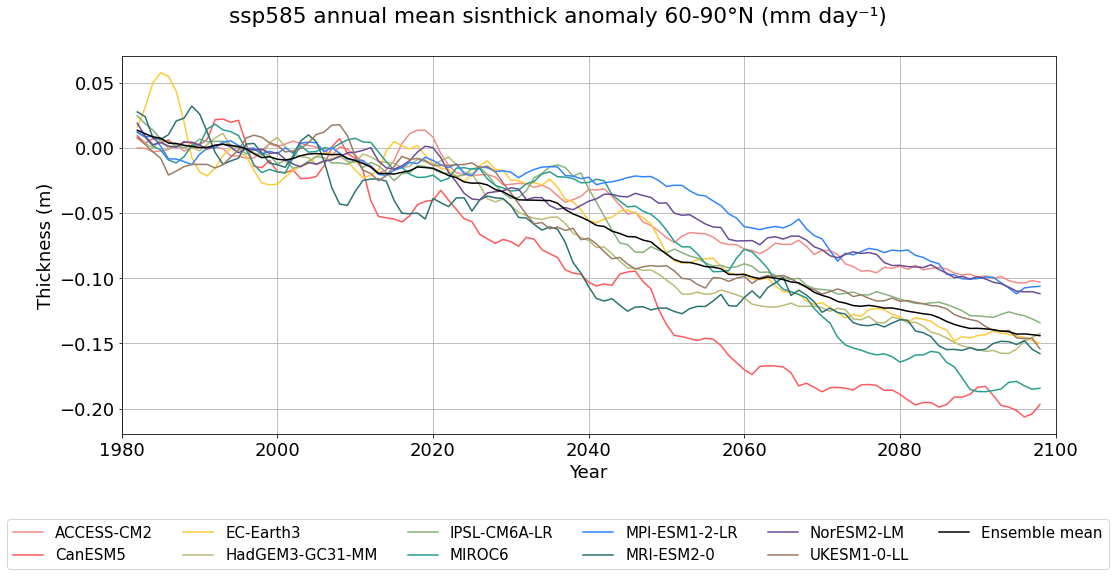

In [14]:
ensemble_sisnthick_time_series = libs.local.get_ensemble_series('sisnthick', experiment, region=region, suffix=suffix)
vars_series = [
    ensemble_sisnthick_time_series
]
plot_arr = []
for item in vars_series:
    item_processed = item.groupby('time.year').mean('time').rolling(year=5, center=True).mean('year')
    item_processed = libs.ensemble.calc_variable_mean(item_processed)
    plot_arr.append(item_processed)

libs.plot.time_series_from_vars(
    plot_arr,
    title=f'{experiment} annual mean sisnthick anomaly 60-90°N ({time_series_units})',
    xattr='year',
    ylabel='Thickness (m)',
    #yrange=time_series_y_range
);